# 懶人函式_v1

In [28]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson
import statsmodels
import statistics as stat
import math

In [80]:
def my_inference(p_value, alpha, claim):
    if p_value < alpha:
        print(f"Since the p_value = {p_value:.4f} < {alpha}, we reject the null hypothesis.\nThat is, we have sufficient evidence to claim that {claim}.")
    else:
        print(f"Since the p_value = {p_value:.4f} > {alpha}, we do not reject the null hypothesis.\nThat is, we do not have sufficient evidence to claim that {claim}.")

def my_normality_check(sample_data, data_name, data_unit, alpha):
    # histogram
    fig, ax = plt.subplots()
    counts, bins, patches = plt.hist((sample_data.dropna()).astype(float), 6, density=False, facecolor='g', alpha=0.75)
    plt.title(f'Histogram of {data_name}')
    plt.xlabel(data_unit)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Shapiro-Wilk test
    print("Shapiro-Wilk test for normality:")
    print("H0: The distribution is normal.")
    print("H1: The distribution is not normal.")
    stat, p = stats.shapiro(sample_data.dropna())
    print(f'For population = {data_name}')
    print(f"Shapiro statistic = {stat:.6f} and p_value = {p:.6f}")
    p_value = p; claim = "the distribution is not normal"
    my_inference(p_value, alpha, claim)
    
    # QQ plot
    fig = sm.qqplot(sample_data.dropna(), stats.norm, fit=True, line='45')
    plt.title(f'Q-Q Plot for {data_name}')
    plt.show()

def my_scatter_plot(sample_data, X_name, Y_name, X_unit, Y_unit):
    _ = sns.regplot(x = sample_data[X_name], y = sample_data[Y_name], color = 'b', ci = None)
    plt.title(f'Scatter Plot for {X_name} and {Y_name}')
    plt.xlabel(f'{X_name} ({X_unit})')
    plt.ylabel(f'{Y_name} ({Y_unit})')
    plt.show()
    
def Sample_Mean_Hypothesis_Testing(x, H0_x_bar, a):
    x_bar = x.mean()
    x_std = stat.stdev(x)
    x_n = x.size
    print(f"mean = {x_bar:.4f}")
    print(f"std. dev. = {x_std:.4f}")
    print(f"Number of observation = {x_n}")
    print(f"Hypothesized mean = {H0_x_bar}")
    print(f"Significant level = {a}")
    tstat = (x_bar - H0_x_bar) / (x_std / (x_n ** 0.5))
    print(f"t-stat = {tstat:.4f}")
    if tstat > 0:
        tcv_onetail = stats.t.ppf(1 - a, df = x_n - 1)
    else:
        tcv_onetail = stats.t.ppf(a, df = x_n - 1)    
    print(f"t critical value one tail = {tcv_onetail:.4f}")
    if tstat > 0:
        p_onetail = 1 - stats.t.cdf(tstat, df = x_n - 1)
    else:
        p_onetail = stats.t.cdf(tstat, df = x_n - 1)
    print(f"p-value (one-tail) = {p_onetail:.4f}")
    if tstat > 0:
        tcv_twotail = stats.t.ppf(1 - a/2, df = x_n - 1)
    else:
        tcv_twotail = stats.t.ppf(a/2, df = x_n - 1)
    print(f"t critical value two tail = {tcv_twotail:.4f}")
    p_twotail = p_onetail * 2
    print(f"p-value (two-tail) = {p_twotail:.4f}")
    return p_onetail, p_twotail

def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

def required_conditions_for_error(SD, y_pre, Y_name):
    # check required conditions
    print('Checking for required conditions for error variable:\n')

    mu = np.mean(SD)
    sigma = np.std(SD)
    
    ## The error is a random variable with mean of zero.
    print('\n1. Zero mean')
    print(f'H0: Errors have zero mean.')
    print(f'H1: Errors do not have zero mean.')
    H0_x_bar = 0
    p_onetail, p_twotail = Sample_Mean_Hypothesis_Testing(SD, H0_x_bar, alpha)
    claim = "the errors do not have zero mean"
    my_inference(p_twotail, alpha, claim)
    
    print(f'\n2. Normality')
    print(f'H0: Errors are normally distributed.')
    print(f'H1: Errors are not normally distributed.')
    
    
    ## The error is a normally distributed random variable.
    my_normality_check(pd.Series(SD), "standarized residuals", "unit", alpha)
    
    ## The variance of the error term is the same for all values of the independent variable.
    print('\n3. Homoskedasticity')
    print('H0: Homoskedasticity')
    print('H1: Heteroskedasticity')
    
    plt.plot(y_pre, SD, 'o', color = 'gray')
    plt.axhline(y=0, color = 'blue')
    plt.axhline(y=2, color = 'red')
    plt.axhline(y=-2, color = 'red')
    plt.title('Standardized Residual Plot')
    plt.xlabel(Y_name)
    plt.ylabel('Standardized Residual')
    plt.show()
    print('Do not rejected H0. Heteroscedasticity does not appear to be a problem.')
    
    
    ## The values of the error are independent
    print('\n4. Independence')
    print('\n4-1. Randomness')
    print('H0 : Randomness exists.')
    print('H1 : Randomness does not exist.')
    SD_median = statistics.median(SD)
    Z_pval = runsTest(SD, SD_median)
    print('p_value for Z-statistic= ', Z_pval)
    claim = 'randomness does not exist'
    my_inference(Z_pval, alpha, claim)
    
    print('\n4-2. No Autocorrelation')
    print('H0 : There is no first-order correlation.')
    print('H1 : There is first-order correlation.')
    
#     d = Durbin_Watson_test(x)
    
def my_multicollinearity_test(X):
    corr = X.corr()
    _ = sns.heatmap(corr, annot=True)
    multicollinearity_pairs = []
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if (corr.iloc[i, j] > 0.7):
                multicollinearity_pairs.append((corr.columns[i], corr.columns[j]))
    if len(multicollinearity_pairs) == 0:
        print("Multicollinearity will not be a problem.")
    else:
        print(f"Multicollinearity exists between {multicollinearity_pairs}.")
    return multicollinearity_pairs

def my_outlier(SD):
    df = pd.DataFrame(SD,columns = ['SD'])
    filter = (df['SD'] < -2) | (df['SD'] > 2)
    outliers = df['SD'].loc[filter]
    if len(outliers) == 0:
        print('There are no outliers.')
    else:
        print("Outliers by SD = \n")
        print(outliers)
        print('\nOutliers:')
        out = ''
        indices = outliers.index
        for i, idx in enumerate(indices):
            if i == len(indices) - 1:
                out += f'sample {idx + 1}.'
            else:
                out += f'sample {idx + 1}, '
        print(out)
        
def my_hii(X, ols_result):
    H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
    df_h = pd.DataFrame({
        'hii': np.diagonal(H)
    })
    k = ols_result.df_model
    n = len(df_h['hii'])
    h_level = 3 * (k + 1) / n 
    print("h_level = ", h_level)
    print(" \n")
    filter = (df_h['hii'] > h_level )
    hii = df_h['hii']
    inf_hii = hii.loc[filter]
    if len(inf_hii) == 0:
        print('There are no influential observations by hii.')
    else:
        print("Influential observations by hii = \n")
        print(inf_hii)
        print('\Influential observations:')
        out = ''
        indices = inf_hii.index
        for i, idx in enumerate(indices):
            if i == len(indices) - 1:
                out += f'sample {idx + 1}.'
            else:
                out += f'sample {idx + 1}, '
    return hii, inf_hii
    

def my_cooks_distance(ols_result, data, hii):
    s2_e = ols_result.mse_resid
    k = ols_result.df_model
    y_a = data[:, 1]
    y_f = data[:, 2]
    CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * hii / np.square(1 - hii)
    CD = np.array(CD_arr)
    df_cd = pd.DataFrame(CD,columns = ['CD'])
    filter = (df_cd['CD'] > 1 )
    inf_cd = df_cd['CD'].loc[filter]
    
    if len(inf_cd) == 0:
        print("There are no influential observations by Cook's Distances.")
    else:
        print("Influential observations by Cook's Distances = \n")
        print(inf_cd)
        print('\Influential observations:')
        out = ''
        indices = inf_cd.index
        for i, idx in enumerate(indices):
            if i == len(indices) - 1:
                out += f'sample {idx + 1}.'
            else:
                out += f'sample {idx + 1}, '
    return inf_cd

def my_simple_linear_regression(sample_data, X_name, Y_name, X_unit, Y_unit, alpha):
    # scatter plot
    my_scatter_plot(sample_data, X_name, Y_name, X_unit, Y_unit)
    
    # ols regression
    ols_result = smf.ols(f'{Y_name} ~ {X_name}', data = sample_data).fit()  
    display(ols_result.summary())
    b1 = ols_result.params[1]
    b0 = ols_result.params[0]
    print(f"Estimated model: {Y_name} = {b0:0.4f} + {b1:0.4f} {X_name}")
    
    ## interpret the model
    print(f'The intercept is b0 = {b0:0.4f}.')
    print(f'The slope of the line is b1 = {b1:0.4f}. For each additional {X_unit} on {X_name}, \
          {Y_name} decreases by an average of {b1:0.4f} {Y_unit}.')
    

    
    # check required conditions
    
    ## required conditions for error term
    st, data, ss = sso.summary_table(ols_result, alpha = alpha)
    SD = data[:, 10]
    y_pre = data[:, 2]
    
    required_conditions_for_error(SD, y_pre, Y_name)
    
    # detecting outliers
    my_outlier(SD)
    
    # influential observations
    ## hii
    hii, inf_hii = my_hii(sample_data.drop(sample_data.columns[0], axis = 1) , ols_result)
    
    ## cook's distance
    my_cooks_distance(ols_result, data, hii)
    
    # assessing the model
    print('Assessing the model:')
    ## standard error of estimate
    print('Assessment 1: standard error of estimate')
    s2_e = ols_result.mse_resid
    print(f'MSE: {s2_e:.4f}')
    s_e = ols_result.mse_resid ** 0.5
    print(f'Standard errors: {s_e:.4f}')
    print(f"mean of y = {sample_data[Y_name].mean():.4f}")
    print(f"variance of y = {sample_data[Y_name].var(ddof=1):.4f}")
    print(f"standard deviation of y = {sample_data[Y_name].std(ddof=1):.4f}")


    ## using descriptive measurements, r2 and r
    print('Assessment 2: using descriptive measurements, r2 and r')
    r, pvalue = stats.pearsonr(sample_data[Y_name], sample_data[X_name])
    print("r = ", r)
    print("r^2 = ", r**2)
     
    
    ## testing and/or estimating the coefficients
    print('Assessment 3: testing and/or estimating the coefficients')

def my_multiple_linear_regression(sample_data, alpha):
    Y = sample_data.iloc[:, 0]
    Y_name = Y.name
    X = sample_data.iloc[:, 1:]
    
    ## no muliticollinearity
    multicollinearity_pairs = my_multicollinearity_test(X)
    
    # ols regression
    regression_str = Y_name + " ~ "
    for idx, x_name in enumerate(X.columns):
        if idx == 0:
            regression_str += x_name
        else:
            regression_str += f" + {x_name}"
    print(regression_str)
    
    ols_result = smf.ols(regression_str, data = sample_data).fit()  
    display(ols_result.summary())
    
    # check required conditions
    
    ## required conditions for error term
    st, data, ss = sso.summary_table(ols_result, alpha = alpha)
    SD = data[:, 10]
    y_pre = data[:, 2]
    required_conditions_for_error(SD, y_pre, Y.name)
    
    # detecting outliers
    my_outlier(SD)
    
    # influential observations
    ## hii
    hii, inf_hii = my_hii(X, ols_result)
    
    ## cook's distance
    my_cooks_distance(ols_result, data, hii)
    
    
    print('\nAssessing the model:')
    
    ## The Standard Error of Estimate 
    print('\nAssessment 1: standard error of estimate')
    s2_e = ols_result.mse_resid
    print(f'MSE: {s2_e:.4f}')
    s_e = ols_result.mse_resid ** 0.5
    print(f'Standard errors: {s_e:.4f}')
    print(f"mean of y = {sample_data[Y_name].mean():.4f}")
    print(f"variance of y = {sample_data[Y_name].var(ddof=1):.4f}")
    print(f"standard deviation of y = {sample_data[Y_name].std(ddof=1):.4f}")
    
    ## The Coefficient of Determination
    print('\nAssessment 2: Coefficient of Determination')
    print(f"R-squared: {ols_result.rsquared}")
    print(f"Adjusted R-squared: {ols_result.rsquared_adj}")
    if abs(ols_result.rsquared - ols_result.rsquared_adj) > 0.06:
        print(f'Since the difference between R-squared and the adjusted R-squared is {abs(ols_result.rsquared - ols_result.rsquared_adj):.4f} > 0.06, there might be a problem of over-fitting.')
    else:
        print(f'Since the difference between R-squared and the adjusted R-squared is {abs(ols_result.rsquared - ols_result.rsquared_adj):.4f} <= 0.06, there will not be a problem of over-fitting.')
    
    ## The F-test of ANOVA
    f_res = ols_result.fvalue
    print("F value = ", f_res)
    MSE = ols_result.mse_resid
    df_model = ols_result.df_model
    df_error = ols_result.df_resid
    MSR = f_res * MSE
    SSR = MSR * df_model
    print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
    print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
    print("F = ", MSR / MSE)
    A = np.identity(len(ols_result.params))
    A = A[1:,:]
    print("F test = ", ols_result.f_test(A))
    p_value = ols_result.f_pvalue
    claim = 'the model is valid'
    my_inference(p_value, alpha, claim)

    
    ## Testing of the Coefficients
#     print('\nAssessment 3: testing and/or estimating the coefficients')

In [81]:
df17_7 = pd.read_excel(io = '../homework/hw8/datasets/Xr17-07.xlsx')
df17_7

/Users/chenyuhan/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Sales,Direct,Newspaper,Television
0,15.98,1.05,1.35,1.55
1,21.59,1.29,2.25,1.97
2,25.47,0.96,1.79,1.64
3,16.02,1.51,1.73,1.73
4,16.58,1.30,1.71,1.61
5,20.10,1.06,1.61,1.82
6,17.49,0.86,1.62,1.97
7,22.53,0.78,2.20,1.61
8,23.98,1.20,1.77,1.13
9,18.96,0.83,1.17,1.77


Multicollinearity will not be a problem.
Sales ~ Direct + Newspaper + Television


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.698
Date:                Sun, 26 May 2024   Prob (F-statistic):              0.198
Time:                        13:51:45   Log-Likelihood:                -57.058
No. Observations:                  25   AIC:                             122.1
Df Residuals:                      21   BIC:                             127.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3084      4.698      2.620      0.016       2.538      22.079
Direct         0.5699      1.720      0.331      0.744      -3.008       4.147
Newspaper      3.3200      1.539      2.157      0.043       0.120       6.520
Television     0.7322      1.958      0.374      0.712      -3.341       4.805
==============================================================================
Omnibus:                        2.472   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.818
Skew:                           0.657   Prob(JB):                        0.403
Kurtosis:                       2.857   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking for required conditions for error variable:


1. Zero mean
H0: Errors have zero mean.
H1: Errors do not have zero mean.
mean = 0.0094
std. dev. = 1.0154
Number of observation = 25
Hypothesized mean = 0
Significant level = 0.05
t-stat = 0.0462
t critical value one tail = 1.7109
p-value (one-tail) = 0.4818
t critical value two tail = 2.0639
p-value (two-tail) = 0.9635
Since the p_value = 0.9635 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that the errors do not have zero mean.

2. Normality
H0: Errors are normally distributed.
H1: Errors are not normally distributed.
Shapiro-Wilk test for normality:
H0: The distribution is normal.
H1: The distribution is not normal.
For population = standarized residuals
Shapiro statistic = 0.941622 and p_value = 0.161361
Since the p_value = 0.1614 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that the distribution is not normal.


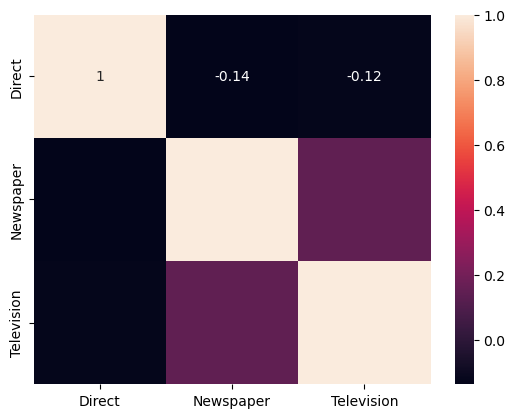

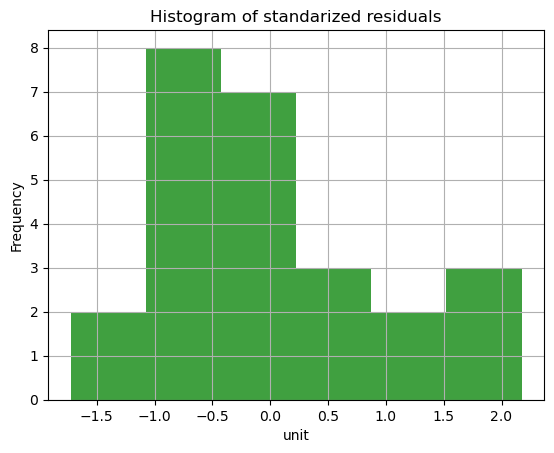

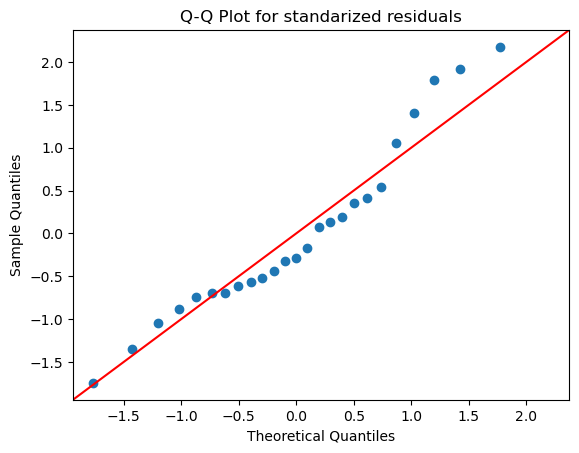


3. Homoskedasticity
H0: Homoskedasticity
H1: Heteroskedasticity


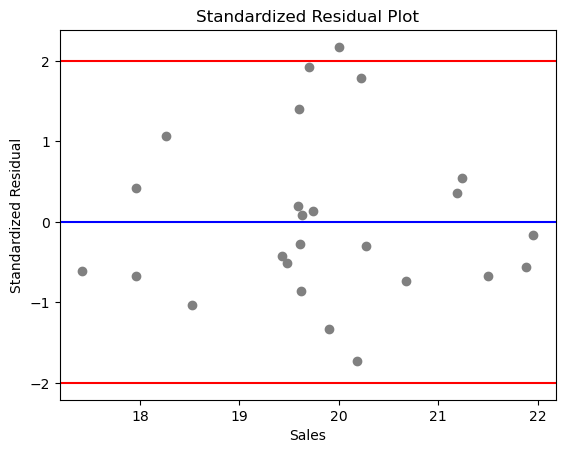

Do not rejected H0. Heteroscedasticity does not appear to be a problem.

4. Independence

4-1. Randomness
H0 : Randomness exists.
H1 : Randomness does not exist.
runs =  13
n1 =  13
n2 =  12
runs_exp =  13.48
stan_dev =  2.443276488652072
z =  -0.19645750377797438
pval_z =  0.8442520915487808
p_value for Z-statistic=  0.8442520915487808
Since the p_value = 0.8443 > 0.05, we do not reject the null hypothesis.
That is, we do not have sufficient evidence to claim that randomness does not exist.

4-2. No Autocorrelation
H0 : There is no first-order correlation.
H1 : There is first-order correlation.
Outliers by SD = 

2    2.173337
Name: SD, dtype: float64

Outliers:
sample 3.
h_level =  0.48
 

There are no influential observations by hii.
There are no influential observations by Cook's Distances.

Assessing the model:

Assessment 1: standard error of estimate
MSE: 6.6933
Standard errors: 2.5871
mean of y = 19.8216
variance of y = 7.2776
standard deviation of y = 2.6977

Assessment 2: Coe

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_80461/2173836610.py:200: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))


In [83]:
sample_data = df17_7
alpha = 0.05
my_multiple_linear_regression(sample_data, alpha)